In [57]:
#for tau mode

import numpy as np
from sympy import Symbol, integrate, sqrt, cos, exp
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_c = 0.464 * 10**(-12)
tau_total = 6.5821*10**(-25)/tau_b_c

# Masses in GeV/c^2
#m_Bc = 6.2749   #mass of m_Bc meson
m_Bc = 6.275
#m_jpsi = 3.0969  #mass of J/psi
m_jpsi = 3.096
m_b = 4.18
m_c = 1.275
m_tau = 1.776
#m_e = 0.000511
m_uon = 0.1056584

#q_2 = 5
#r = m_D_star/m_B  #r=r_D_star


#q_2 = 5
#m_l = m_tau
# Spacing and defining range
q_2 = np.linspace(m_l**2, (m_Bc - m_jpsi)**2, 10000)

#error
er_V_C_0 = 0.02
er_A_C_0_0 = 0.03
er_A_C_1_0 = 0.03
er_A_C_2_0 = 0.03


#form_factor
V_C_0 = 0.42
A_C_0_0 = 0.59
A_C_1_0 = 0.46
A_C_2_0 = 0.64





def D_gamma(m_l,q_2):


  lamda_jpsi = ((m_Bc-m_jpsi)**2 -q_2)*((m_Bc+m_jpsi)**2-q_2)

  #wilson coefficenits
  C_V_1 = 0
  C_V_2 = 0
  C_S_2 = 0
  C_S_1 = 0
  C_T = 0



  V_C = V_C_0*np.exp(0.065*q_2 + 0.0015*q_2**2)
  A_C_0 = A_C_0_0*np.exp(0.047*q_2 + 0.0017*q_2**2)
  A_C_1 = A_C_1_0*np.exp(0.038*q_2 + 0.0015*q_2**2)
  A_C_2 = A_C_2_0*np.exp(0.064*q_2 + 0.0041*q_2**2)

  #tensor form_factor
  T_C_1 = ((m_b + m_c)/(m_Bc + m_jpsi))*V_C
  T_C_2 = ((m_b - m_c)/(m_Bc - m_jpsi))*A_C_1
  T_C_3 = -((m_b-m_c)/q_2)*((m_Bc*(A_C_1 - A_C_2)) + m_jpsi*(A_C_2 + A_C_1 - 2*A_C_0))

  #hadronoic helicity amplitude
  H_V_plus = (m_Bc + m_jpsi)*A_C_1 - ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C
  H_V_minus = (m_Bc + m_jpsi)*A_C_1 + ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C

  H_V_0 = ((m_Bc + m_jpsi)/(2*m_jpsi*np.sqrt(q_2)))*(-(m_Bc**2 - m_jpsi**2 - q_2)*A_C_1 + (lamda_jpsi/(m_Bc + m_jpsi)**2)*A_C_2)
  H_V_t = -np.sqrt(lamda_jpsi/q_2)*A_C_0

  H_S = -(np.sqrt(lamda_jpsi)/(m_b+m_c))*A_C_0

  H_T_plus = (1/np.sqrt(q_2))*((m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)
  H_T_minus = (1/np.sqrt(q_2))*(-(m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)

  #H_T_0 = (1/2*m_jpsi)*(-(m_Bc**2+ 3*m_jpsi**2 -q_2)*T_C_2 + (lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3)
  H_T_0 = (1/2*m_jpsi)*((lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3 - (m_Bc**-m_jpsi**2)*T_C_2)
  #hadronic transition

  alpha = (G_F**2*(abs(V_cb))**2)/(192*np.pi**3*m_Bc**3)*q_2*np.sqrt(lamda_jpsi)*(1-(m_l**2/q_2))**2

  B_1 = (1+(abs(C_V_1))**2 + (abs(C_V_2))**2)*((1+(m_l**2/(2*q_2)))*(H_V_plus**2 + H_V_minus**2 + H_V_0**2) + (3/2)*(m_l**2/q_2)*H_V_t**2)

  B_2 = 2*((1+C_V_1)*np.conjugate(C_V_2)).real * (((1+(m_l**2/(2*q_2))))*(H_V_0**2 + 2*H_V_plus*H_V_minus) + (3/2)*(m_l**2/q_2)*H_V_t**2)

  B_3 = (3/2)*(abs(C_S_1-C_S_2))**2*H_S**2 + 8*(abs(C_T))**2*(1+(2*m_l**2/q_2))*(H_T_plus**2 + H_T_minus**2 + H_T_0**2)

  B_4 = 3*((((1 + C_V_1 - C_V_2))*(np.conjugate(C_S_1)-np.conjugate(C_S_2))).real)*(m_l/np.sqrt(q_2))*H_S*H_V_t

  B_5 = -12*(((1+C_V_1)*np.conjugate(C_T)).real)*(m_l/q_2)*(H_T_0*H_V_0 + H_T_plus*H_V_plus - H_T_minus*H_V_minus)

  B_6 = 12*((C_V_2*np.conjugate(C_T)).real) * (m_l/np.sqrt(q_2))*(H_T_0 *H_V_0 + H_T_plus*H_V_minus - H_T_minus*H_V_plus)

  D_gamma = alpha*(B_1 + B_2 + B_3 + B_4 + B_5 + B_6)
  return (D_gamma)
#print(D_gamma(m_l,q_2))

def D_gamma_u(m_l,q_2):


  lamda_jpsi = ((m_Bc-m_jpsi)**2 -q_2)*((m_Bc+m_jpsi)**2-q_2)

  V_C_0_u = V_C_0 + er_V_C_0
  A_C_0_0_u = A_C_0_0 + er_A_C_0_0
  A_C_1_0_u = A_C_1_0 + er_A_C_1_0
  A_C_2_0_u = A_C_2_0 + er_A_C_2_0



  #wilson coefficenits
  C_V_1 = 0
  C_V_2 = 0
  C_S_2 = 0
  C_S_1 = 0
  C_T = 0



  V_C = V_C_0_u*np.exp(0.065*q_2 + 0.0015*q_2**2)
  A_C_0 = A_C_0_0_u*np.exp(0.047*q_2 + 0.0017*q_2**2)
  A_C_1 = A_C_1_0_u*np.exp(0.038*q_2 + 0.0015*q_2**2)
  A_C_2 = A_C_2_0_u*np.exp(0.064*q_2 + 0.0041*q_2**2)

  #tensor form_factor
  T_C_1 = ((m_b + m_c)/(m_Bc + m_jpsi))*V_C
  T_C_2 = ((m_b - m_c)/(m_Bc - m_jpsi))*A_C_1
  T_C_3 = -((m_b-m_c)/q_2)*((m_Bc*(A_C_1 - A_C_2)) + m_jpsi*(A_C_2 + A_C_1 - 2*A_C_0))

  #hadronoic helicity amplitude
  H_V_plus = (m_Bc + m_jpsi)*A_C_1 - ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C
  H_V_minus = (m_Bc + m_jpsi)*A_C_1 + ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C

  H_V_0 = ((m_Bc + m_jpsi)/(2*m_jpsi*np.sqrt(q_2)))*(-(m_Bc**2 - m_jpsi**2 - q_2)*A_C_1 + (lamda_jpsi/(m_Bc + m_jpsi)**2)*A_C_2)
  H_V_t = -np.sqrt(lamda_jpsi/q_2)*A_C_0

  H_S = -(np.sqrt(lamda_jpsi)/(m_b+m_c))*A_C_0

  H_T_plus = (1/np.sqrt(q_2))*((m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)
  H_T_minus = (1/np.sqrt(q_2))*(-(m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)

  #H_T_0 = (1/2*m_jpsi)*(-(m_Bc**2+ 3*m_jpsi**2 -q_2)*T_C_2 + (lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3)
  H_T_0 = (1/2*m_jpsi)*((lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3 - (m_Bc**-m_jpsi**2)*T_C_2)
  #hadronic transition

  alpha = (G_F**2*(abs(V_cb))**2)/(192*np.pi**3*m_Bc**3)*q_2*np.sqrt(lamda_jpsi)*(1-(m_l**2/q_2))**2

  B_1 = (1+(abs(C_V_1))**2 + (abs(C_V_2))**2)*((1+(m_l**2/(2*q_2)))*(H_V_plus**2 + H_V_minus**2 + H_V_0**2) + (3/2)*(m_l**2/q_2)*H_V_t**2)

  B_2 = 2*((1+C_V_1)*np.conjugate(C_V_2)).real * (((1+(m_l**2/(2*q_2))))*(H_V_0**2 + 2*H_V_plus*H_V_minus) + (3/2)*(m_l**2/q_2)*H_V_t**2)

  B_3 = (3/2)*(abs(C_S_1-C_S_2))**2*H_S**2 + 8*(abs(C_T))**2*(1+(2*m_l**2/q_2))*(H_T_plus**2 + H_T_minus**2 + H_T_0**2)

  B_4 = 3*((((1 + C_V_1 - C_V_2))*(np.conjugate(C_S_1)-np.conjugate(C_S_2))).real)*(m_l/np.sqrt(q_2))*H_S*H_V_t

  B_5 = -12*(((1+C_V_1)*np.conjugate(C_T)).real)*(m_l/q_2)*(H_T_0*H_V_0 + H_T_plus*H_V_plus - H_T_minus*H_V_minus)

  B_6 = 12*((C_V_2*np.conjugate(C_T)).real) * (m_l/np.sqrt(q_2))*(H_T_0 *H_V_0 + H_T_plus*H_V_minus - H_T_minus*H_V_plus)

  D_gamma_u = alpha*(B_1 + B_2 + B_3 + B_4 + B_5 + B_6)
  return (D_gamma_u)

def D_gamma_l(m_l,q_2):


  lamda_jpsi = ((m_Bc-m_jpsi)**2 -q_2)*((m_Bc+m_jpsi)**2-q_2)

  V_C_0_l = V_C_0 - er_V_C_0
  A_C_0_0_l = A_C_0_0 - er_A_C_0_0
  A_C_1_0_l = A_C_1_0 - er_A_C_1_0
  A_C_2_0_l = A_C_2_0 - er_A_C_2_0



  #wilson coefficenits
  C_V_1 = 0
  C_V_2 = 0
  C_S_2 = 0
  C_S_1 = 0
  C_T = 0



  V_C = V_C_0_l*np.exp(0.065*q_2 + 0.0015*q_2**2)
  A_C_0 = A_C_0_0_l*np.exp(0.047*q_2 + 0.0017*q_2**2)
  A_C_1 = A_C_1_0_l*np.exp(0.038*q_2 + 0.0015*q_2**2)
  A_C_2 = A_C_2_0_l*np.exp(0.064*q_2 + 0.0041*q_2**2)

  #tensor form_factor
  T_C_1 = ((m_b + m_c)/(m_Bc + m_jpsi))*V_C
  T_C_2 = ((m_b - m_c)/(m_Bc - m_jpsi))*A_C_1
  T_C_3 = -((m_b-m_c)/q_2)*((m_Bc*(A_C_1 - A_C_2)) + m_jpsi*(A_C_2 + A_C_1 - 2*A_C_0))

  #hadronoic helicity amplitude
  H_V_plus = (m_Bc + m_jpsi)*A_C_1 - ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C
  H_V_minus = (m_Bc + m_jpsi)*A_C_1 + ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C

  H_V_0 = ((m_Bc + m_jpsi)/(2*m_jpsi*np.sqrt(q_2)))*(-(m_Bc**2 - m_jpsi**2 - q_2)*A_C_1 + (lamda_jpsi/(m_Bc + m_jpsi)**2)*A_C_2)
  H_V_t = -np.sqrt(lamda_jpsi/q_2)*A_C_0

  H_S = -(np.sqrt(lamda_jpsi)/(m_b+m_c))*A_C_0

  H_T_plus = (1/np.sqrt(q_2))*((m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)
  H_T_minus = (1/np.sqrt(q_2))*(-(m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)

  #H_T_0 = (1/2*m_jpsi)*(-(m_Bc**2+ 3*m_jpsi**2 -q_2)*T_C_2 + (lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3)
  H_T_0 = (1/2*m_jpsi)*((lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3 - (m_Bc**-m_jpsi**2)*T_C_2)
  #hadronic transition

  alpha = (G_F**2*(abs(V_cb))**2)/(192*np.pi**3*m_Bc**3)*q_2*np.sqrt(lamda_jpsi)*(1-(m_l**2/q_2))**2

  B_1 = (1+(abs(C_V_1))**2 + (abs(C_V_2))**2)*((1+(m_l**2/(2*q_2)))*(H_V_plus**2 + H_V_minus**2 + H_V_0**2) + (3/2)*(m_l**2/q_2)*H_V_t**2)

  B_2 = 2*((1+C_V_1)*np.conjugate(C_V_2)).real * (((1+(m_l**2/(2*q_2))))*(H_V_0**2 + 2*H_V_plus*H_V_minus) + (3/2)*(m_l**2/q_2)*H_V_t**2)

  B_3 = (3/2)*(abs(C_S_1-C_S_2))**2*H_S**2 + 8*(abs(C_T))**2*(1+(2*m_l**2/q_2))*(H_T_plus**2 + H_T_minus**2 + H_T_0**2)

  B_4 = 3*((((1 + C_V_1 - C_V_2))*(np.conjugate(C_S_1)-np.conjugate(C_S_2))).real)*(m_l/np.sqrt(q_2))*H_S*H_V_t

  B_5 = -12*(((1+C_V_1)*np.conjugate(C_T)).real)*(m_l/q_2)*(H_T_0*H_V_0 + H_T_plus*H_V_plus - H_T_minus*H_V_minus)

  B_6 = 12*((C_V_2*np.conjugate(C_T)).real) * (m_l/np.sqrt(q_2))*(H_T_0 *H_V_0 + H_T_plus*H_V_minus - H_T_minus*H_V_plus)

  D_gamma_l = alpha*(B_1 + B_2 + B_3 + B_4 + B_5 + B_6)
  return (D_gamma_l)




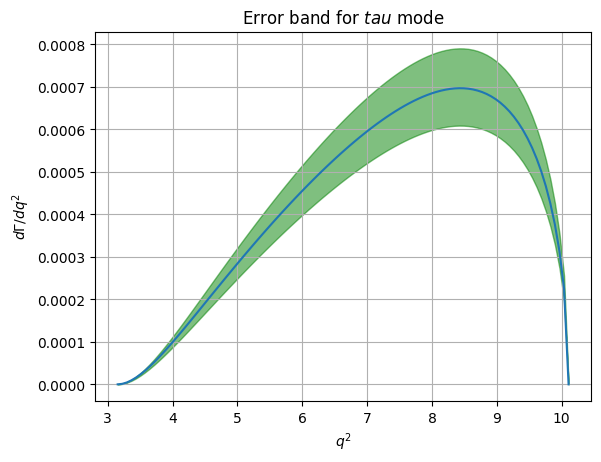

In [58]:
#electron mode
q_2 = np.linspace(m_tau**2,(m_Bc-m_jpsi)**2,100)
y = (D_gamma(m_tau,q_2)/tau_total)
# Calculate corresponding y values with upper and lower bounds of errors


y_u = (D_gamma_u(m_tau,q_2) /tau_total)
y_l = (D_gamma_l(m_tau,q_2) /tau_total)

# Create the plot with shaded error region
plt.plot(q_2, y , label='Central Value for tau mode')
plt.fill_between(q_2, y_l, y_u, color='green', alpha=0.5, label='Error Bounds for tau mode ')
plt.xlabel('$q^2$')
plt.ylabel('$d\Gamma/dq^2$')
plt.title('Error band for $tau$ mode')
plt.grid()
plt.show()






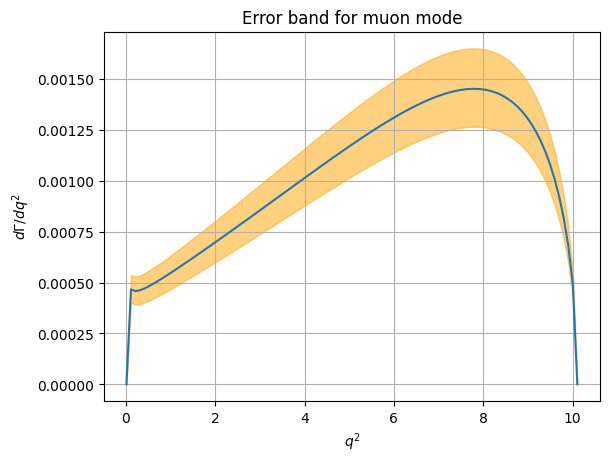

In [59]:
#muon error bandq
q_2 = np.linspace(m_uon**2,(m_Bc-m_jpsi)**2,100)
y = (D_gamma(m_uon,q_2) /tau_total)

# Calculate corresponding y values with upper and lower bounds of errors


y_u = (D_gamma_u(m_uon,q_2) /tau_total)

y_l = (D_gamma_l(m_uon,q_2) /tau_total)

plt.plot(q_2, y , label='Central Value for muon mode')
plt.fill_between(q_2, y_l, y_u, color='orange', alpha=0.5, label='Error Bounds for $muon$ mode')
plt.xlabel('$q^2$')
plt.ylabel('$d\Gamma/dq^2$')
plt.title('Error band for muon mode')
plt.grid('true')
plt.show()

In [60]:
from scipy.integrate import quad
BR_tau,_= quad(lambda x:D_gamma(m_tau,x),m_tau**(2),(m_Bc-m_jpsi)**(2))
print(BR_tau)

4.284764926564887e-15


In [61]:
from scipy.integrate import quad
BR_uon,_= quad(lambda x:D_gamma(m_uon,x),m_uon**(2),(m_Bc-m_jpsi)**(2))
print(BR_uon)

1.4779795534081723e-14


In [62]:
print(BR_tau/BR_uon)

0.28990691492885406
